In [1]:
# Importamos librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Funciones

In [2]:
#función para visualizar las diferentes opciones por columna en el caso de las categoricas o el máximo y mínimo en el caso de columnas numéricas
def ver_opciones_por_columna(df):
    lista_tipo=['O']
    lista_tipo_num=['float64','int64']
    opciones ={'Columnas':[], 'Opciones por Columna':[]}
    for c in list(df.columns):
        if df[c].dtypes in lista_tipo:
            opciones['Columnas'].append(c)
            opciones['Opciones por Columna'].append(df[c].unique())
            #print(c, ':   ',df[c].unique() )
        elif df[c].dtypes in lista_tipo_num: 
            lista_max_min= [df[c].max(), df[c].min()]
            opciones['Columnas'].append(c)
            opciones['Opciones por Columna'].append(lista_max_min)
            lista_max_min=[]
            #print(c, ':   ',lista_max_min )
            
    pd.set_option('max_rows', None)
    pd.set_option('max_columns', 500)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_colwidth',None)         
    
    return pd.DataFrame(opciones)

#función para contar ouliers
def contar_outliers(df):
    numero_de_outliers ={'Columnas':[], 'Numero Outliers':[]}
    for  column in range(df.shape[1]):
        lista_tipo=['float64', 'int64']
        if (df.iloc[:,column]).dtypes in lista_tipo:
            df_data=df.iloc[:,column]
            q1 = df_data.quantile(q=0.25)
            q2 = df_data.quantile(q=0.5)
            q3 = df_data.quantile(q=0.75)
            iqr = q3 - q1
            upper = q3 + 1.5 * iqr
            lower = q1 - 1.5 * iqr    
            #Contar número de outliers
            ubicacion_outliers = (df_data<lower) | (df_data>upper)
            numero_outliers = ubicacion_outliers[ubicacion_outliers==True].sum()
            #print(numero_outliers)
            # Agrego suma de outliers por columna
            numero_de_outliers['Columnas'].append(df.columns[column])
            numero_de_outliers['Numero Outliers'].append(numero_outliers)    
            
    return pd.DataFrame(numero_de_outliers).sort_values('Numero Outliers', ascending=False)

def calcular_porcentaje_de_unknown(dataframe_1):
    porcentaje_faltantes ={'Columnas':[], 'Porcentaje_Unknown':[]}
    for c in list(dataframe_1.columns):
        porcentaje_faltantes['Columnas'].append(c)
        sum_val_unknown=  dataframe_1[dataframe_1[c]== 'nan'][c].count()  + dataframe_1[dataframe_1[c]== np.nan][c].count()                                 
        porcentaje_calculado=sum_val_unknown*100/dataframe_1.shape[0]
        porcentaje_faltantes['Porcentaje_Unknown'].append(porcentaje_calculado)
    return pd.DataFrame(porcentaje_faltantes).sort_values('Porcentaje_Unknown', ascending=False)

# Datos

### **I.**	Exploración y Visualización de datos

#### 1. ¿Qué definición y dimensiones tienen los datos?

**Tabla 1**, Definiciones de los campos

|No | Campos | Definición | Tipo de Dato |
| --- | --- | --- | --- |
|1.    | OBJECTID | Identificador del objeto | str |
|2.    | x_geo | Información de coordenadas geográficas | int |
|3.    | y_geo  | Información de coordenadas geográficas | int |
|4.    | p_s6p46 | Variable códificada que representa la información del tipo de cultivo o plantación forestal que está en el lote   | str |
|5.    | MPIO_CDPMP | Código del municipio | str |
|6.    |cultivo | Tipo de cultivo  | str |
|7.    |MPIO_cultivo | código del municipio y tipo de cultivo | str |
|8.    |rend | Rendimiento (t/ha) | int |
|9.    |prod| Producción obtenida (t)| int |
|10.    |area_cos| Área cosechada de los cultivos (ha)| int |
|11.    |Periodicid| Frecuencia con la que se realiza siembra del cultivo en el lote | str |
|12.    |Cultivo_1| Cultivo anterior| str |

In [3]:
df = pd.read_csv('datos/Rendimientos_upa_municipios.csv', sep = ";")

In [70]:
divipola = pd.read_csv('datos/DIVIPOLA-_C_digos_municipios.csv')

In [4]:
print('--> La tabla de datos  tiene ', df.shape[0], ' filas  y  ', df.shape[1], ' columnas')

--> La tabla de datos  tiene  1048575  filas  y   13  columnas


- 7 variables categóricas y 6 variables numéricas

#### 2. Tipo de datos 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   TARGET_FID    1048575 non-null  int64  
 1   OBJECTID      1048575 non-null  int64  
 2   x_geo         1048575 non-null  float64
 3   y_geo         1048575 non-null  float64
 4   p_s6p46       1048575 non-null  int64  
 5   MPIO_CDPMP    1048352 non-null  float64
 6   cultivo       1048575 non-null  object 
 7   MPIO_cultivo  1048575 non-null  object 
 8   rend          1048575 non-null  float64
 9   prod          1048575 non-null  float64
 10  area_cos      1048575 non-null  float64
 11  Periodicid    1047322 non-null  object 
 12  Cultivo_1     1047322 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 104.0+ MB


In [6]:
df['MPIO_CDPMP']= df['MPIO_CDPMP'].astype('str')
df['p_s6p46']= df['p_s6p46'].astype('str')

In [7]:
ver_opciones_por_columna(df)

,Columnas,Opciones por Columna
0,TARGET_FID,"[1048574, 0]"
1,OBJECTID,"[1048575, 1]"
2,x_geo,"[-66.872612, -81.73443604]"
3,y_geo,"[13.38355732, -4.203239441]"
4,p_s6p46,"[121904001, 131101001, 123502001, 123101001, 125201001, 131999020, 129006001, 131201001, 121302001, 131925001, 125301001, 125402001, 125401001, 121903001, 121903002, 121201002, 121301001, 129099002, 131903001, 131907001, 134401001, 131917001, 131902001, 131901001, 121901001, 121401001, 132201001, 131904001, 112201002, 112201001, 132401001, 131601001, 132301002, 151001001, 151002002, 129004001, 131801001, 123102001, 131921001, 131301001, 125902001, 125901001, 121201003, 129099004, 123401001, 131910001, 159201001, 125101001, 113202001, 124201001, 131914001, 131999028, 131701001, 111201001, 131912001, 131913001, 131918001, 144901001, 131905001, 131922001, 146001001, 124903000, 121201001, 144301001, 141201001, 123301001, 131906001, 135101001, 151003001, 144401001, 159101001, 131924001, 135903001, 114201001, 131909001, 131916001, 115201001, 118201001, 122101001, 132901001, 121101001, 135601001, 135201001, 149102001, 124901001, 119002001, 131919001, 127001001, 123902001, 134301003, 135901001, 131999033, 123501001, 131902003, 121601001, 132202001, 131999018, 129003001, 133001001, 131926001, ...]"
5,MPIO_CDPMP,"[5001.0, 5002.0, 5004.0, 5021.0, 5030.0, 5031.0, 5034.0, 5036.0, 5038.0, 5040.0, 5042.0, 5044.0, 5045.0, 5051.0, 5055.0, 5059.0, 5079.0, 5086.0, 5088.0, 5091.0, 5093.0, 5101.0, 5107.0, 5113.0, 5120.0, 5125.0, 5129.0, 5134.0, 5138.0, 5142.0, 5145.0, 5147.0, 5148.0, 5150.0, 5154.0, 5172.0, 5190.0, 5197.0, 5206.0, 5209.0, 5212.0, 5234.0, 5237.0, 5240.0, 5250.0, 5264.0, 5266.0, 5282.0, 5284.0, 5306.0, 5308.0, 5310.0, 5313.0, 5315.0, 5318.0, 5321.0, 5347.0, 5353.0, 5360.0, 5361.0, 5364.0, 5368.0, 5376.0, 5380.0, 5390.0, 5400.0, 5411.0, 5425.0, 5440.0, 5467.0, 5475.0, 5480.0, 5483.0, 5490.0, 5495.0, 5501.0, 5541.0, 5543.0, 5576.0, 5579.0, 5585.0, 5591.0, 5604.0, 5607.0, 5615.0, 5628.0, 5631.0, 5642.0, 5647.0, 5649.0, 5652.0, 5656.0, 5658.0, 5659.0, 5660.0, 5664.0, 5665.0, 5667.0, 5670.0, 5674.0, ...]"
6,cultivo,"[Acelga, Aguacate, Ahuyama, Ajíes y pimientos, Ajos, Almirajo, Apio, Banano, Brócoli, Brevo, Cebolla cabezona, Cebolla larga, Cebolla Puerro, Cilantro, Cilantro cimarrón, Col, Coliflor, Culantro, Curuba, Feijoa, Fresa, Granadilla, Guanabana, Guayaba, Habichuela, Lechuga, Limón, Lulo, Maíz Amarillo, Maíz Blanco, Mandarina, Mango, Naranja, Papas, Papas criollas, Perejil, Piña, Pimentón, Pinuela, Platano, Rabano, Remolacha, Repollitas de bruselas, Sidra, Tomate, Tomate De Arbol, Yuca, Zanahoria, Arroz verde, Arveja verde, Chirimoya- Chirimorrinon, Granada, Papaya, Trigo en grano, Uchuva, Anon- Vinon- Saramuyo, Gulupa, Higuerilla, Maracuya, Carambolo- Tiriguro- Arbol Del Pepino, Coco, Haba verde, Repollo, Canola, Soja (Soya), Berenjenas, Borojo, Manzana, Papa china, Ajonjolí, Batata, Guamo, Mamey, Sorgo, Tamarindo- Magyi- Chita, Zapote - Chupa Chupa, Cebada, Mijo, Sandía - Patilla, Cidra, poncil, Esparrago, Ciruela, Pera, Palma africana, Garbanzo verde, Quinua, Papayuela, Champiñon, Cuya, Frambuesa, Chontaduro, Bacao- Maraca, Calabazas y calabacines, Guanacona, Alcachofa, Lima, Milpesillo, Estragón, Uva, Caimo, ...]"
7,MPIO_cultivo,"[05001Acelga, 05001Aguacate, 05001Ahuyama, 05001Ajíes y pimientos, 05001Ajos, 05001Almirajo, 05001Apio, 05001Banano, 05001Brócoli, 05001Brevo, 05001Cebolla cabezona, 05001Cebolla larga, 05001Cebolla Puerro, 05001Cilantro, 05001Cilantro cimarrón, 05001Col, 05001Coliflor, 05001Culantro, 05001Curuba, 05001Feijoa, 05001Fresa, 05001Granadilla, 05001Guanabana, 05001Guayaba, 05001Habichuela, 05001Lechuga, 05001Limón, 05001Lulo, 05001Maíz Amarillo, 05001Maíz Blanco, 05001Mandarina, 05001Mango, 05001Naranja, 05001Papas, 05001Papas criollas, 05001Perejil, 05001Piña, 05001Pimentón, 05001Pinuela, 05001Platano, 05001Rabano, 05001Remolacha, 05001Repollitas de bruselas, 05001Sidra, 05001Tomate, 05001Tomate De Arbol, 05001Yuca, 05001Zanahoria, 05002

#### 4. ¿Cuántos valores desconocidos y outliers existen para cada columna?

- Definimos las variables de interés

In [8]:
df_01=df.loc[:, ['rend','prod','area_cos']]

In [9]:
contar_outliers(df_01).head(60)

,Columnas,Numero Outliers
0,rend,153888
2,area_cos,119419
1,prod,107416


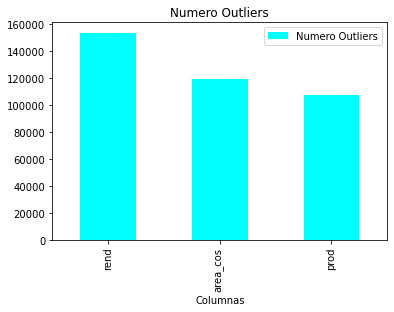

In [10]:
plt.rcParams["figure.figsize"] = (6,4)
pn=contar_outliers(df_01.iloc[:,0:]).set_index('Columnas')
ax = pn.plot.bar(color = 'cyan', title = 'Numero Outliers')
plt.show()

In [11]:
calcular_porcentaje_de_unknown(df)

,Columnas,Porcentaje_Unknown
5,MPIO_CDPMP,0.021267
0,TARGET_FID,0.000000
1,OBJECTID,0.000000
2,x_geo,0.000000
3,y_geo,0.000000
4,p_s6p46,0.000000
6,cultivo,0.000000
7,MPIO_cultivo,0.000000
8,rend,0.000000
9,prod,0.000000


#### 4.1 Descripción de los datos 

In [12]:
df_01.describe().T

,count,mean,std,min,25%,50%,75%,max
rend,1048575.0,56.964931,154.937324,0.000003,2.188330,8.791615,37.789953,11420.76465
prod,1048575.0,10.829576,149.627018,0.000004,3.071679,5.060987,8.538944,86899.68240
area_cos,1048575.0,3.491945,48.083071,0.006200,0.143554,0.613336,2.112488,20000.00000


#### 5.     Relacion entre variables

In [13]:
df_01.corr(method="pearson")

,rend,prod,area_cos
rend,1.000000,0.009471,-0.025247
prod,0.009471,1.000000,0.237365
area_cos,-0.025247,0.237365,1.000000


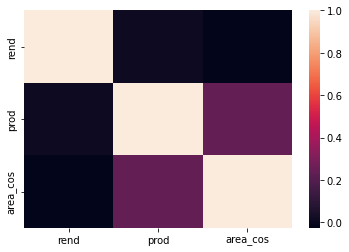

In [14]:
sns.heatmap(df_01.corr())
plt.show()

In [15]:
sns.pairplot(df_01)
plt.show()

KeyboardInterrupt: 

#### Histogramas

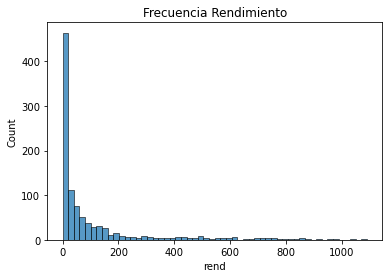

In [15]:
sns.histplot(x=df.rend.iloc[:1000]).set(title='Frecuencia Rendimiento'); 
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

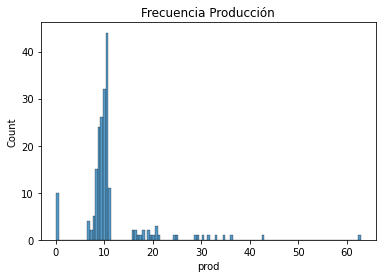

In [16]:
sns.histplot(x=df['prod'].iloc[:200]).set(title='Frecuencia Producción'); 
plt.show()

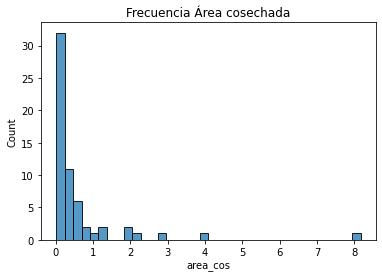

In [17]:
sns.histplot(x=df.area_cos.iloc[:60]).set( title='Frecuencia Área cosechada');  
plt.show()

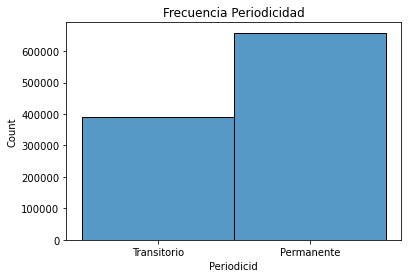

In [18]:
sns.histplot(x=df.Periodicid).set( title='Frecuencia Periodicidad'); 
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

In [19]:
df_01=df.groupby('cultivo').agg({ 'prod': 'sum', 'area_cos': 'sum',  'rend': 'mean'}).reset_index()

In [20]:
df_02=df_01.sort_values('prod',ascending=False)

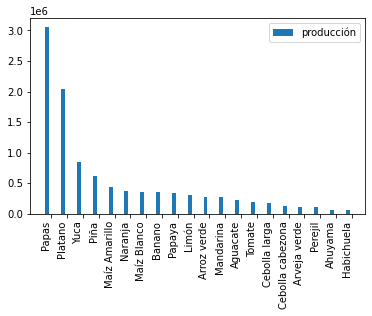

In [21]:

fig = plt.figure()
n = len(df_02.cultivo.iloc[:20])
x = np.arange(n)
width = 0.25
plt.bar(x - width, df_02['prod'].iloc[:20], width=width, label='producción')
plt.xticks(x, df_02.cultivo.iloc[:20])
plt.legend(loc='best')
fig.autofmt_xdate(rotation=90)
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

In [22]:
df_03=df_01.sort_values('area_cos',ascending=False)

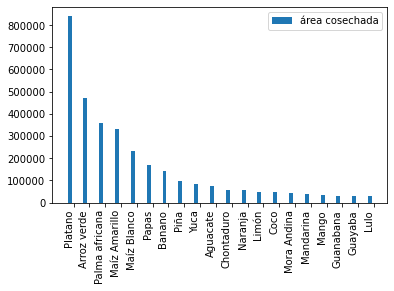

In [23]:
fig = plt.figure()
n = len(df_03.cultivo.iloc[:20])
x = np.arange(n)
width = 0.25
plt.bar(x - width, df_03['area_cos'].iloc[:20], width=width, label='área cosechada')
plt.xticks(x, df_03.cultivo.iloc[:20])
plt.legend(loc='best')
fig.autofmt_xdate(rotation=90)
plt.rcParams["figure.figsize"] =  (6,4)
plt.show()

In [24]:
df_04=df_01.sort_values('rend',ascending=False)

<Figure size 720x432 with 0 Axes>

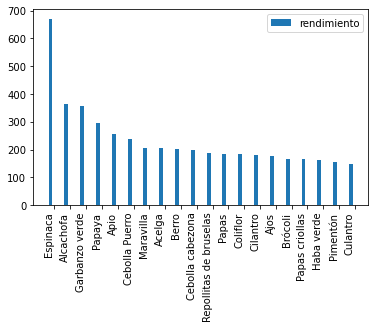

In [25]:
plt.figure(figsize=(10,6))
fig = plt.figure()
n = len(df_04.cultivo.iloc[:20])
x = np.arange(n)
width = 0.25
plt.bar(x - width, df_04['rend'].iloc[:20], width=width, label='rendimiento')
plt.xticks(x, df_04.cultivo.iloc[:20])
plt.legend(loc='best')
fig.autofmt_xdate(rotation=90)
plt.rcParams["figure.figsize"] =  (6,4)
plt.show()

In [336]:
leCultivo= LabelEncoder()
leCultivo.fit(X["cultivo"])
X["cultivo"]=leCultivo.transform(X.cultivo)

KeyError: 'cultivo'

# Desarrollo del algoritmo

In [202]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from kneed import KneeLocator

In [369]:
df.head()

,TARGET_FID,OBJECTID,x_geo,y_geo,p_s6p46,MPIO_CDPMP,cultivo,MPIO_cultivo,rend,prod,area_cos,Periodicid,Cultivo_1
0,241972,241973,-75.661598,6.297552,121904001,5001.0,Acelga,05001Acelga,21.651312,8.364622,0.386333,Transitorio,Acelga
1,242013,242014,-75.631668,6.294356,121904001,5001.0,Acelga,05001Acelga,46.166847,8.712359,0.188715,Transitorio,Acelga
2,242040,242041,-75.655678,6.304490,121904001,5001.0,Acelga,05001Acelga,33.799198,8.145967,0.241011,Transitorio,Acelga
3,242055,242056,-75.611473,6.257732,121904001,5001.0,Acelga,05001Acelga,4.384921,17.201645,3.922909,Transitorio,Acelga
4,242099,242100,-75.655792,6.301595,121904001,5001.0,Acelga,05001Acelga,62.047428,9.225109,0.148678,Transitorio,Acelga


In [100]:
df1 = df[['x_geo', 'y_geo', 'MPIO_CDPMP', 'cultivo', 
          'rend', 'prod', 'area_cos']].copy()
df1 = df1.dropna()

In [101]:
df1['MPIO_CDPMP'] = df1['MPIO_CDPMP'].astype(float).astype(int)

In [106]:
coldivi = ['Código Departamento', 'Código Municipio', 'Nombre Departamento', 'Nombre Municipio']
df1 = df1.merge(divipola[coldivi], left_on='MPIO_CDPMP', right_on='Código Municipio')
df1.head()

,x_geo,y_geo,MPIO_CDPMP,cultivo,rend,prod,area_cos,Código Departamento,Código Municipio,Nombre Departamento,Nombre Municipio
0,-75.661598,6.297552,5001,Acelga,21.651312,8.364622,0.386333,5,5001,ANTIOQUIA,MEDELLÍN
1,-75.631668,6.294356,5001,Acelga,46.166847,8.712359,0.188715,5,5001,ANTIOQUIA,MEDELLÍN
2,-75.655678,6.304490,5001,Acelga,33.799198,8.145967,0.241011,5,5001,ANTIOQUIA,MEDELLÍN
3,-75.611473,6.257732,5001,Acelga,4.384921,17.201645,3.922909,5,5001,ANTIOQUIA,MEDELLÍN
4,-75.655792,6.301595,5001,Acelga,62.047428,9.225109,0.148678,5,5001,ANTIOQUIA,MEDELLÍN


In [276]:
df1.groupby(by='cultivo').count().sort_values(by='x_geo',ascending=False)

,x_geo,y_geo,MPIO_CDPMP,rend,prod,area_cos,Código Departamento,Código Municipio,Nombre Departamento,Nombre Municipio
cultivo,,,,,,,,,,
Platano,298259,298259,298259,298259,298259,298259,298259,298259,298259,298259
Maíz Amarillo,107172,107172,107172,107172,107172,107172,107172,107172,107172,107172
Maíz Blanco,81627,81627,81627,81627,81627,81627,81627,81627,81627,81627
Banano,61711,61711,61711,61711,61711,61711,61711,61711,61711,61711
Papas,34321,34321,34321,34321,34321,34321,34321,34321,34321,34321
Yuca,32968,32968,32968,32968,32968,32968,32968,32968,32968,32968
Arroz verde,31218,31218,31218,31218,31218,31218,31218,31218,31218,31218
Aguacate,30700,30700,30700,30700,30700,30700,30700,30700,30700,30700
Piña,24793,24793,24793,24793,24793,24793,24793,24793,24793,24793


In [110]:
df1.groupby(by='Nombre Departamento').count().sort_values(by='x_geo',ascending=False)

,x_geo,y_geo,MPIO_CDPMP,cultivo,rend,prod,area_cos,Código Departamento,Código Municipio,Nombre Municipio
Nombre Departamento,,,,,,,,,,
NARIÑO,119705,119705,119705,119705,119705,119705,119705,119705,119705,119705
CAUCA,116019,116019,116019,116019,116019,116019,116019,116019,116019,116019
CHOCÓ,73190,73190,73190,73190,73190,73190,73190,73190,73190,73190
TOLIMA,72541,72541,72541,72541,72541,72541,72541,72541,72541,72541
ANTIOQUIA,66845,66845,66845,66845,66845,66845,66845,66845,66845,66845
CUNDINAMARCA,53184,53184,53184,53184,53184,53184,53184,53184,53184,53184
VALLE DEL CAUCA,50131,50131,50131,50131,50131,50131,50131,50131,50131,50131
BOYACÁ,49978,49978,49978,49978,49978,49978,49978,49978,49978,49978
SANTANDER,45470,45470,45470,45470,45470,45470,45470,45470,45470,45470


Se escoge Nariño como piloto para el ejercicio

In [113]:
df1.columns

Index(['x_geo', 'y_geo', 'MPIO_CDPMP', 'cultivo', 'rend', 'prod', 'area_cos', 'Código Departamento', 'Código Municipio', 'Nombre Departamento', 'Nombre Municipio'], dtype='object')

In [431]:
columnas = ['x_geo', 'y_geo',
            #'cultivo', 'rend',
            #'prod', 'area_cos',
            'potencial_prod']
#X = df1[df1['Nombre Departamento']=='VALLE DEL CAUCA'].copy()
X = df1[df1['cultivo']=='Soja (Soya)'].copy()
#Cálculamos el potencial de producción multiplicando el potencial de rendimiento (cálculado con el quantile 90) por el área de la UPA
rend_max = X.rend.quantile(.90)
X['potencial_prod'] = np.where( ((rend_max - X.rend) * X.area_cos) <0, 0,  ((rend_max - X.rend) * X.area_cos) )

#X = df1[df1['cultivo']=='Aguacate'].copy()
X = X[columnas]

In [432]:
X.head()

,x_geo,y_geo,potencial_prod
7695,-75.902840,6.533135,290.316526
7879,-75.916565,6.294940,351.649728
8735,-76.582825,7.859476,174.330272
10079,-76.411446,8.607202,1560.605352
16058,-75.103668,7.580066,393.379786


In [433]:
# Escalamos las imágenes del dataset y observamos el dataframe resultante de dicha transformación
mu = X.mean()
sigma = X.std()
Z = (X - mu) / sigma

## K-means

El coeficiente de Silhouette es de 0.6000 para 2 de clústeres
El coeficiente de Silhouette es de 0.6025 para 3 de clústeres
El coeficiente de Silhouette es de 0.6056 para 4 de clústeres
El coeficiente de Silhouette es de 0.6122 para 5 de clústeres
El coeficiente de Silhouette es de 0.5155 para 6 de clústeres
El coeficiente de Silhouette es de 0.5110 para 7 de clústeres
El coeficiente de Silhouette es de 0.5104 para 8 de clústeres
El coeficiente de Silhouette es de 0.5122 para 9 de clústeres
El coeficiente de Silhouette es de 0.5042 para 10 de clústeres


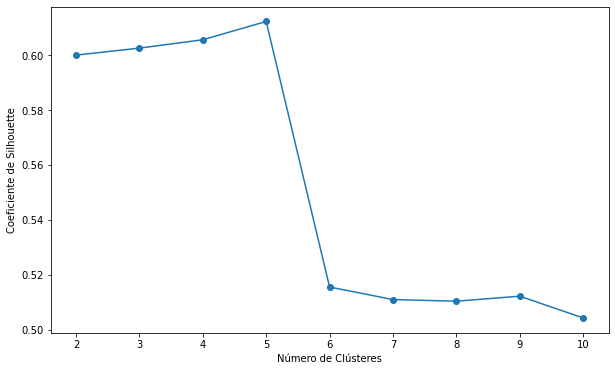

El número óptimo de clústers para un rango entre 0 y 10 es de 8


In [446]:
# Definimos el rango de valores de clústeres a probar
min_clusters = 2
max_clusters = 10

# Almacenamos los valores del coeficiente de Silhouette en una lista
silhouette_scores = []

# Probamos diferentes números de clústeres
for n_clusters in range(min_clusters, max_clusters + 1, 1):
    if n_clusters != 0:
        kmeans = KMeans(n_clusters = n_clusters, random_state = 123)
        pred_etiquetas = kmeans.fit_predict(np.array(Z))
        silhouette = silhouette_score(np.array(Z), pred_etiquetas)
        silhouette_scores.append(silhouette)
        print(f'El coeficiente de Silhouette es de {silhouette:.4f} para {n_clusters} de clústeres')

# Graficamos el coeficiente de Silhouette para diferentes números de clústeres
plt.figure(figsize = (10, 6))
plt.plot(range(min_clusters, max_clusters + 1, 1), silhouette_scores, marker = 'o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

# Identificamos el índice con el coeficiente de Silhouette más alto
k_optimo = (silhouette_scores.index(max(silhouette_scores))+1)*2
print(f'El número óptimo de clústers para un rango entre 0 y 10 es de {k_optimo}')

In [482]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, random_state = 123)
pred_etiquetas = kmeans.fit_predict(np.array(Z))
silhouette = silhouette_score(np.array(Z), pred_etiquetas)
print(f'El coeficiente de Silhouette es de {silhouette:.4f} para {n_clusters} de clústeres')

El coeficiente de Silhouette es de 0.6122 para 5 de clústeres


In [483]:
Xkmeans = X.copy()
Xkmeans['Cluster'] = pred_etiquetas
Xkmeans.groupby(by='Cluster').count()

,x_geo,y_geo,potencial_prod
Cluster,,,
0,1206,1206,1206
1,203,203,203
2,1,1,1
3,360,360,360
4,5,5,5


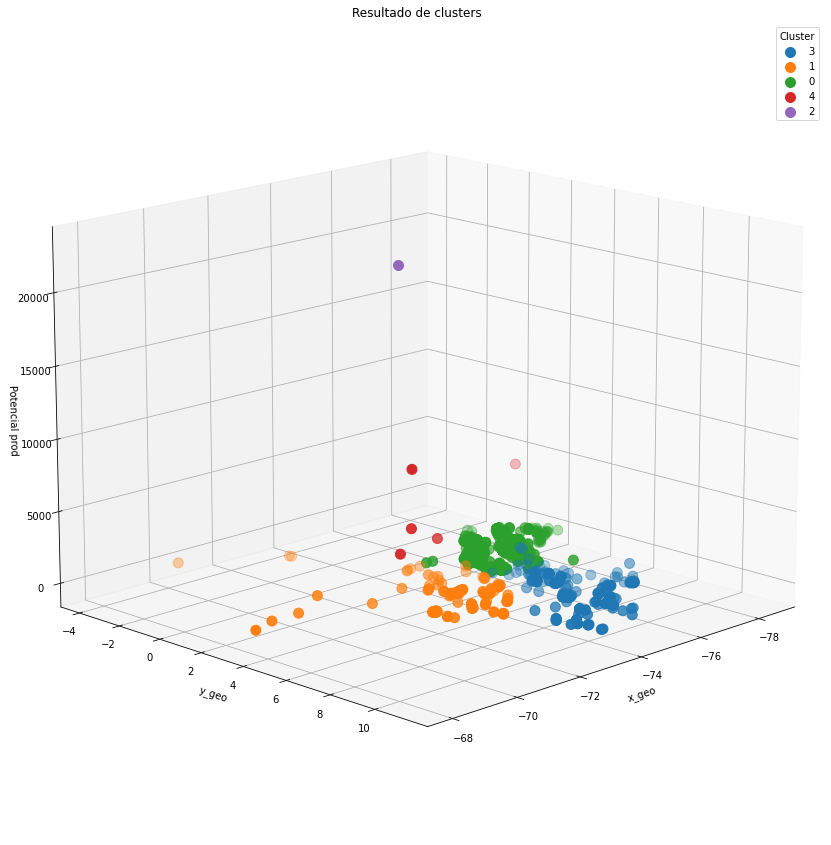

In [477]:
plt.figure(figsize=(20, 15))
axes = plt.axes(projection = '3d')
for k in Xkmeans.Cluster.unique():
    data = Xkmeans[Xkmeans.Cluster == k]
    x = data.x_geo
    y = data.y_geo
    z = data.potencial_prod
    axes.scatter3D( x, y, z, label=k, s=100)
plt.title('Resultado de clusters')
axes.set_xlabel('x_geo')
axes.set_ylabel('y_geo')
axes.set_zlabel('Potencial prod')
axes.view_init(15,45)
plt.legend(title='Cluster')
plt.show()

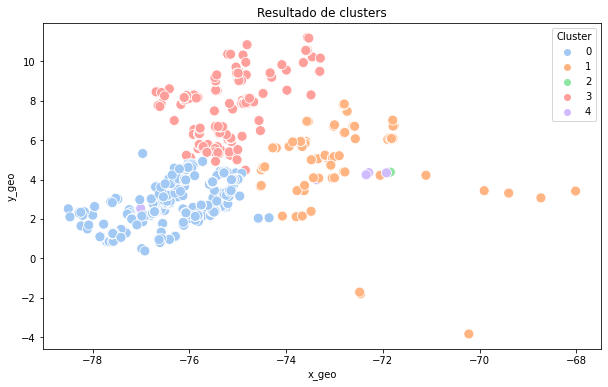

In [484]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xkmeans, x='x_geo', y='y_geo', hue='Cluster', palette='pastel', s=100)
plt.title('Resultado de clusters')
plt.xlabel('x_geo')
plt.ylabel('y_geo')
plt.legend(title='Cluster')
plt.show()

## K-medoids

In [486]:
# Implementamos el algoritmo de K-medoides
kmedoides = KMedoids(n_clusters = n_clusters, random_state = 8)

# Ajustamos el modelo y predecimos las etiquetas
pred_kmedoides = kmedoides.fit_predict(np.array(Z))


In [487]:
Xkmedo = X.copy()
Xkmedo['Cluster'] = pred_kmedoides
Xkmedo.groupby(by='Cluster').count()

,x_geo,y_geo,potencial_prod
Cluster,,,
0,181,181,181
1,457,457,457
2,471,471,471
3,504,504,504
4,162,162,162


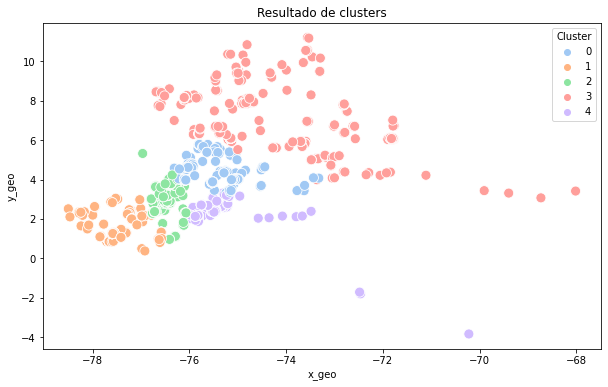

In [488]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xkmedo, x='x_geo', y='y_geo', hue='Cluster', palette='pastel', s=100)
plt.title('Resultado de clusters')
plt.xlabel('x_geo')
plt.ylabel('y_geo')
plt.legend(title='Cluster')
plt.show()

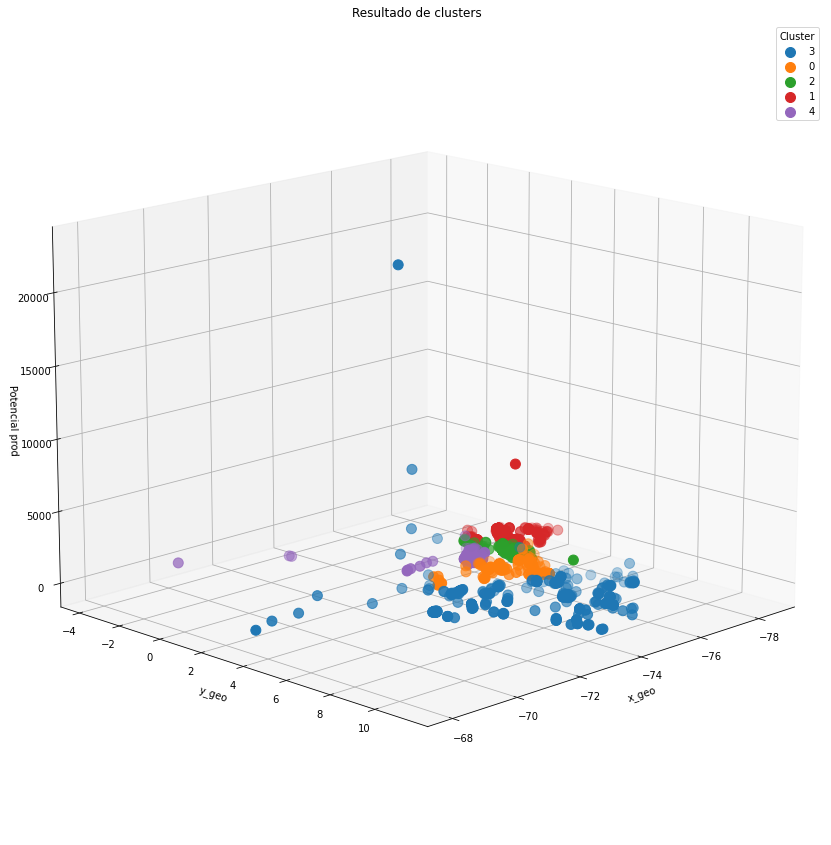

In [490]:
plt.figure(figsize=(20, 15))
axes = plt.axes(projection = '3d')
for k in Xkmedo.Cluster.unique():
    data = Xkmedo[Xkmedo.Cluster == k]
    x = data.x_geo
    y = data.y_geo
    z = data.potencial_prod
    axes.scatter3D( x, y, z, label=k, s=100)
plt.title('Resultado de clusters')
axes.set_xlabel('x_geo')
axes.set_ylabel('y_geo')
axes.set_zlabel('Potencial prod')
axes.view_init(15,45)
plt.legend(title='Cluster')
plt.show()

## DBSCAN

In [491]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [492]:
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(Xs)
distancias, indices = nbrs.kneighbors(Xs)
distancias = np.sort(distancias.flatten())
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

0.1588681346584942


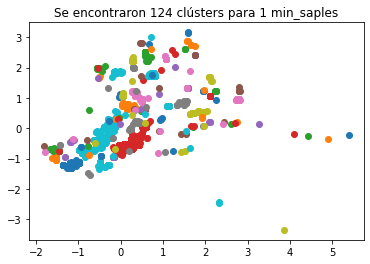

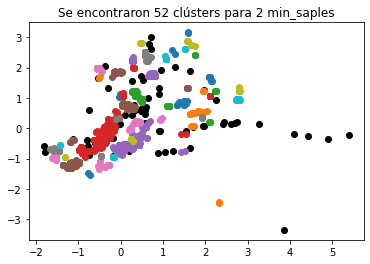

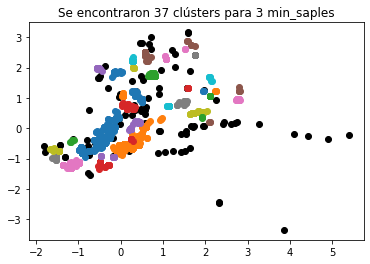

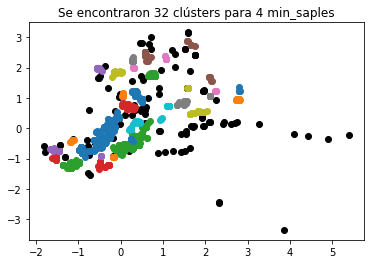

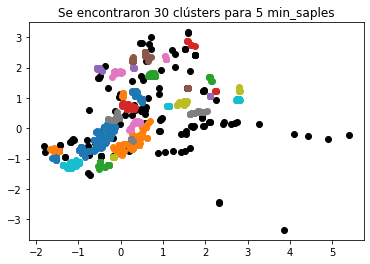

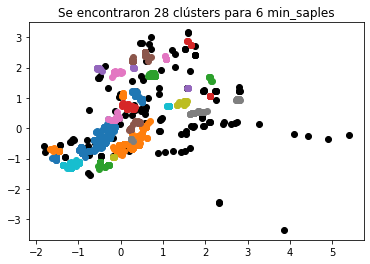

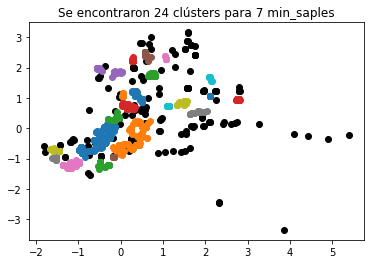

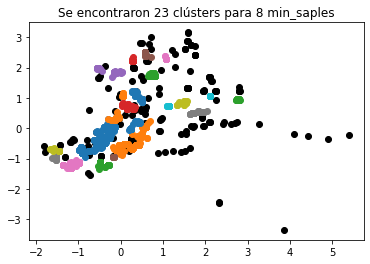

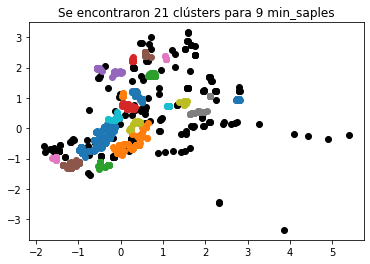

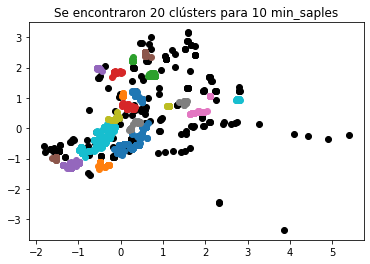

In [493]:
# Implementar DBSCAN para diferentes valores de min_samples
for i in np.arange(1, 11, 1):
    cluster_dbscan = DBSCAN(eps=distancias[knee.knee], min_samples=i).fit(Xs)
    n_clusters = len(set(cluster_dbscan.labels_)) - (1 if -1 in cluster_dbscan.labels_ else 0)
    resultado = pd.DataFrame(Xs).assign(Cluster = cluster_dbscan.labels_)
    plt.figure()
    for k in np.unique(cluster_dbscan.labels_):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0],
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0],
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
    plt.title(f'Se encontraron {n_clusters} clústers para {i} min_saples')

In [496]:
cluster_dbscan = DBSCAN(eps=distancias[knee.knee], min_samples=10).fit(Xs)
n_clusters = len(set(cluster_dbscan.labels_)) - (1 if -1 in cluster_dbscan.labels_ else 0)
Xdb = pd.DataFrame(X).assign(Cluster = cluster_dbscan.labels_)

In [497]:
Xdb.groupby(by='Cluster').count()

,x_geo,y_geo,potencial_prod
Cluster,,,
-1,221,221,221
0,77,77,77
1,13,13,13
2,97,97,97
3,34,34,34
4,18,18,18
5,14,14,14
6,44,44,44
7,12,12,12


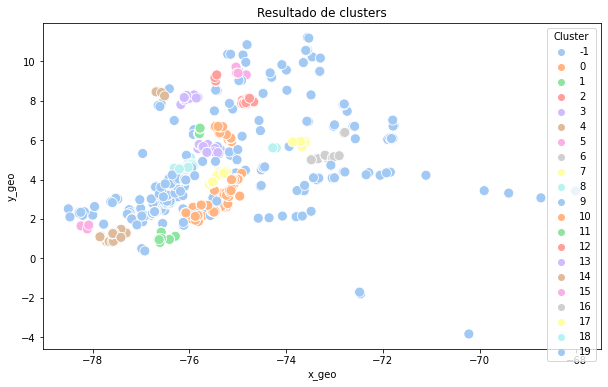

In [498]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xdb, x='x_geo', y='y_geo', hue='Cluster', palette='pastel', s=100)
plt.title('Resultado de clusters')
plt.xlabel('x_geo')
plt.ylabel('y_geo')
plt.legend(title='Cluster')
plt.show()

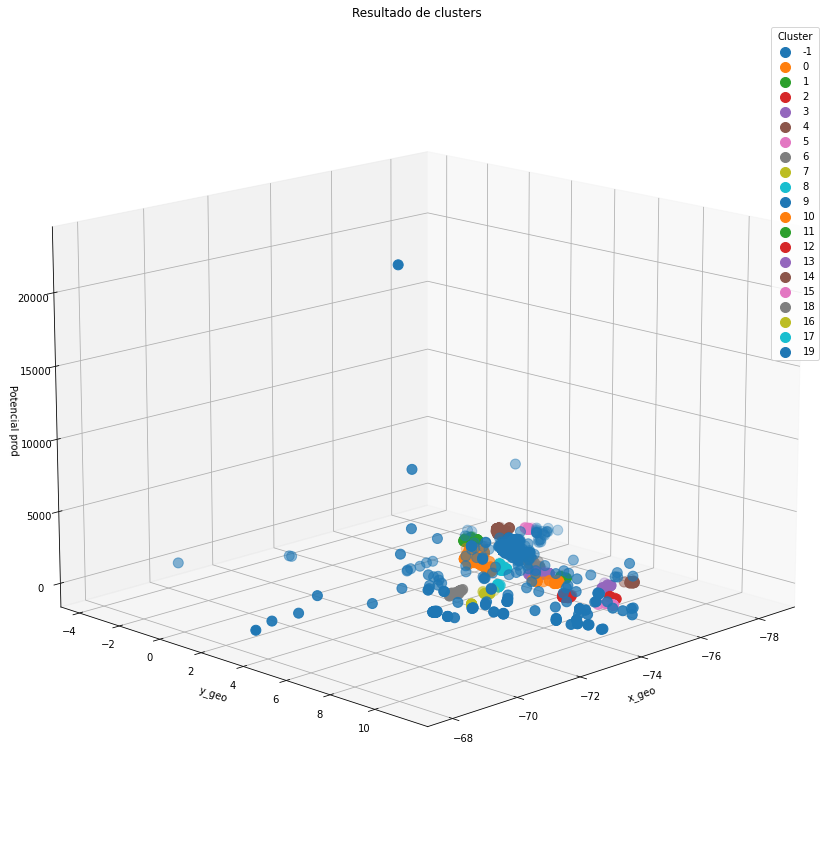

In [499]:
plt.figure(figsize=(20, 15))
axes = plt.axes(projection = '3d')
for k in Xdb.Cluster.unique():
    data = Xdb[Xdb.Cluster == k]
    x = data.x_geo
    y = data.y_geo
    z = data.potencial_prod
    axes.scatter3D( x, y, z, label=k, s=100)
plt.title('Resultado de clusters')
axes.set_xlabel('x_geo')
axes.set_ylabel('y_geo')
axes.set_zlabel('Potencial prod')
axes.view_init(15,45)
plt.legend(title='Cluster')
plt.show()

## Algoritmo jerárquico aglomerativo

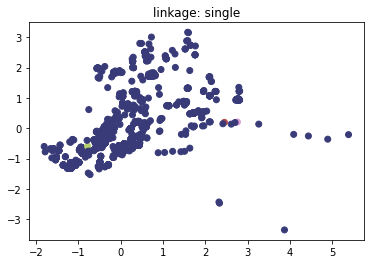

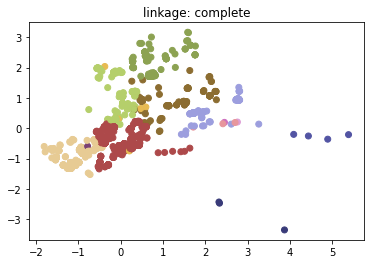

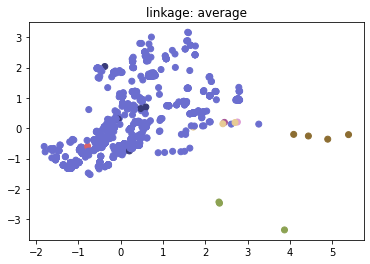

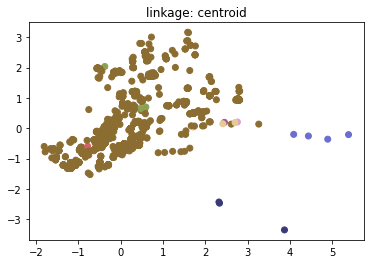

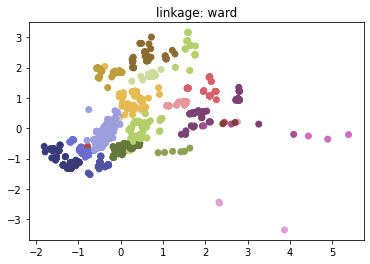

In [512]:
methods = ['single', 'complete', 'average', 'centroid','ward']
for method in methods:
    distances = linkage(Xs, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    plt.title('linkage: ' + method)
    plt.scatter(Xs[:,0], Xs[:,1], c=clusters, cmap='tab20b')
    plt.show()

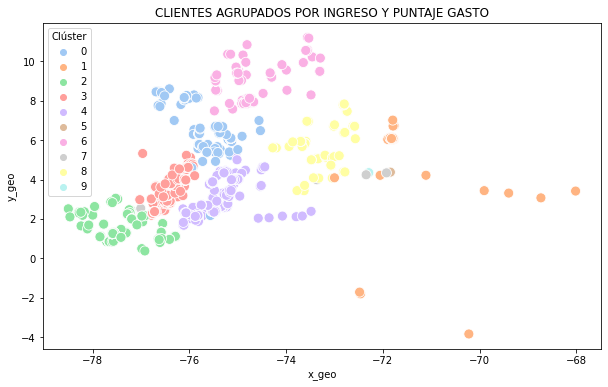

In [527]:
# Implementar el Algoritmo Jerárquico Aglomerativo
cluster_sk = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean')
cluster_sk = cluster_sk.fit_predict(Xs)

# Agregar los resultados al conjunto de datos original
Xac = X.copy()
Xac['Cluster'] = cluster_sk

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xac, x='x_geo', y='y_geo', hue='Cluster', palette='pastel', s=100)
plt.title('CLIENTES AGRUPADOS POR INGRESO Y PUNTAJE GASTO')
plt.xlabel('x_geo')
plt.ylabel('y_geo')
plt.legend(title='Clúster')
plt.show()

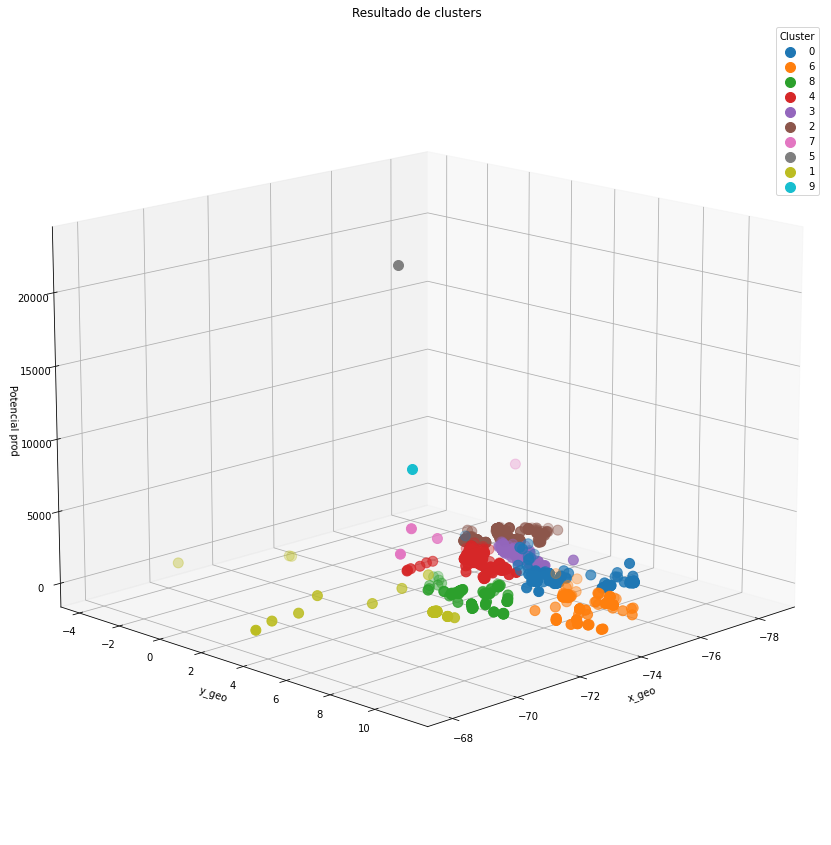

In [528]:
plt.figure(figsize=(20, 15))
axes = plt.axes(projection = '3d')
for k in Xac.Cluster.unique():
    data = Xac[Xac.Cluster == k]
    x = data.x_geo
    y = data.y_geo
    z = data.potencial_prod
    axes.scatter3D( x, y, z, label=k, s=100)
plt.title('Resultado de clusters')
axes.set_xlabel('x_geo')
axes.set_ylabel('y_geo')
axes.set_zlabel('Potencial prod')
axes.view_init(15,45)
plt.legend(title='Cluster')
plt.show()

In [525]:
Xac.groupby(by='Cluster_SK').count()

,x_geo,y_geo,potencial_prod
Cluster_SK,,,
0,184,184,184
1,65,65,65
2,470,470,470
3,488,488,488
4,256,256,256
5,1,1,1
6,178,178,178
7,4,4,4
8,128,128,128


#### Relación de algunas fuentes de interés

- Actualización y ajuste de la información
obtenida en el Estudio de Factibilidad del
Seguro Agrícola Catastrófico para el
cultivo de maíz blanco tradicional en los
departamentos de Antioquia y Tolima

https://www.finagro.com.co/sites/default/files/identificacion_beneficiarios_sac.pdf

- Archivo de datos: S06A(Cultivos)
Corresponde al inventario y prácticas agrícolas y pecuaria en la UPA y descripción básica de cultivos acuícolas. asi como la
sustentabilidad de la actividad agropecuaria, tanto en la gestión sobre recursos naturales como la gestión para la producción.

https://microdatos.dane.gov.co/index.php/catalog/513/data-dictionary/F15?file_name=S06A(Cultivos)